(sec:numpy_2)=
# 어레이 인덱싱

**주요 내용**

- 어레이의 축
- 인덱싱과 슬라이싱
- 부울 인덱싱
- 팬시 인덱싱

**슬라이드**

본문 내용을 요약한 [슬라이드 1부](https://github.com/codingalzi/datapy/raw/master/slides/slides-numpy_2-1.pdf),
[슬라이드 2부](https://github.com/codingalzi/datapy/raw/master/slides/slides-numpy_2-2.pdf)를 다운로드할 수 있다.

**기본 설정**

`numpy` 모듈과 시각화 도구 모듈인 `matplotlib.pyplot`에 대한 기본 설정을 지정한다.

In [1]:
# 넘파이
import numpy as np
# 램덤 시드
np.random.seed(12345)
# 어레이 사용되는 부동소수점들의 정확도 지정
np.set_printoptions(precision=4, suppress=True)

In [2]:
# 파이플롯
import matplotlib.pyplot as plt
# 도표 크기 지정
plt.rc('figure', figsize=(10, 6))

## 어레이의 축과 인덱스

**축**

n-차원 어레이는 n 개의 축<font axis='2'>axis</font>을 갖는다. 
아래 그림은 1차원, 2차원, 3차원 어레이의 축을 설명한다.

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/numpy-array_axis.jpg" style="width:70%;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://www.reallifeedublogging.com/2020/07/numpy-arrays-and-data-analysis.html">NumPy Arrays and Data Analysis</a>&gt;</div></p>

**인덱스**

인덱스는 축<font size='2'>axis</font> 별로 독립적으로 적용한다.
예를 들어 아래 그림은 2차원 어레이가 갖는 두 개의 축에 대해 사용되는 인덱스의
순서를 보여준다.

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/numpy-array_index.png" style="width:30%;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://wesmckinney.com/book/numpy-basics.html">Python for Data Analysis</a>&gt;</div></p>

## 인덱싱과 슬라이싱

리스트의 인덱싱과 슬라이싱 개념과 유사하지만 보다 다양한 기능을 제공한다.
데이터 분석에서 인덱싱과 슬라이싱의 역할이 매우 크다.

### 1차원 어레이 인덱싱, 슬라이싱

1차원 어레이의 경우 리스트의 경우와 거의 동일하다.

In [3]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

* 인덱싱: 리스트의 경우와 동일

In [4]:
arr[5]

5

* 슬라이싱: 구간 확인 기능은 리스트의 경우와 동일

In [5]:
arr[5:8]

array([5, 6, 7])

* 슬라이싱 활용: 구간을 특정 값으로 대체하는 기능

In [6]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

:::{admonition} 주의사항
:class: warning

위 기능은 리스트에서는 제공되지 않는다.

```python
arr = list(arr)
arr[5:8] = 12
```
```python
TypeError                                 Traceback (most recent call last)
<ipython-input-14-f584977ee941> in <module>
----> 1 arr[5:8] = 12
      2 arr

TypeError: can only assign an iterable
```

대신에 아래와 같이 리스트를 값으로 지정해야 한다.

```
arr[5:8] = [12, 12, 12]
```
:::

**뷰<font size='2'>view</font> 이해**

넘파이 어레이에 대해 슬라이싱을 실행하면 지정된 구간에 해당하는 어레이를 새로 생성하는 게 아니라
지정된 구간의 정보를 이용만 한다. 
이렇게 작동하는 기능이 **뷰**이다. 
즉, 어레이를 새로 생성하지 않고 기존 어레이를 적절하게 활용한다.
넘파이 어레이와 관련된 많은 기능이 뷰 기능을 이용한다.

In [7]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

`arr` 변수가 가리키는 어레이의 항목도 함께 달라진다.

In [8]:
arr_slice[1] = 3450
arr

array([   0,    1,    2,    3,    4,   12, 3450,   12,    8,    9])

어레이 전체 항목을 특정 값으로 한꺼번에 바꾸려면 `[:]`로 슬라이싱 한다.

In [9]:
arr_slice[:] = 64
arr_slice

array([64, 64, 64])

`arr` 변수가 가리키는 어레이의 항목도 함께 달라진다.

In [10]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

**`copy()` 메서드**

원본을 그대로 유지하고자 한다면 어레이를 새로 생성해서 사용해야 하며, 이를 위해 `copy()` 메서드를 활용한다.

In [11]:
arr_slice2 = arr[5:8].copy()
arr_slice2

array([64, 64, 64])

`arr_slice2`를 변경해도 `arr`은 영향받지 않는다.

In [12]:
arr_slice2[1] = 12
arr_slice2

array([64, 12, 64])

In [13]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

### 2차원 어레이 인덱싱

2차원 이상의 다차원 어레이는 보다 다양한 인덱싱, 슬라이싱 기능을 제공한다. 

In [14]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

리스트의 인덱싱을 그대로 사용할 수 있다.

* 0번 인덱스 항목: 길이가 3인 1차원 어레이

In [15]:
arr2d[0]

array([1, 2, 3])

* 0번 인덱스의 2번 인덱스 항목: 리스트 인덱싱 방식
    - 0번 인덱스의 항목이 리스트이며, 그 리스트의 2번 인덱스 항목 확인

In [16]:
arr2d[0][2]

3

위 인덱싱을 2차원 어레이 인덱싱 방식으로 아래와 같이 쉽게 할 수 있다.

In [17]:
arr2d[0, 2]

3

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/numpy146.png" style="width:300px;"></div>

### 2차원 어레이 슬라이싱

In [18]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

리스트 슬라이싱 방식을 동일하게 적용할 수 있다.

* 1번 인덱스 이전까지

In [19]:
arr2d[:1]

array([[1, 2, 3]])

* 2번 인덱스 이전까지

In [20]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

* 전체 항목 슬라이싱

In [21]:
arr2d[:3]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

행과 열을 함께 슬라이싱하려면 행과, 열에 대한 슬라이싱을 동시에 지정한다.

* 행 기준: 2번 행 이전까지
* 열 기준: 1번 열부터 끝까지

In [22]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/numpy149-1.png" style="width:350px;"></div>

인덱싱과 슬라이싱이 행과 열 각각에 대해 독립적으로 사용될 수 있다.

* 행 기준: 1번 행 인덱싱
* 열 기준: 2번 열 이전까지

In [23]:
arr2d[1, :2]

array([4, 5])

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/numpy149-4.png" style="width:350px;"></div>

**주의사항:** 인덱싱을 사용하는 만큼 결과 어레이의 차원이 기존 어레이의 차원보다 1씩 줄어든다.

In [24]:
arr2d[1, :2].shape

(2,)

동일한 항목을 사용하지만 인덱싱을 사용할 때와 아닐 때의 결과는 다른 모양의 어레이가 된다.

In [25]:
arr2d[1:2, :2]

array([[4, 5]])

모양은 사용되는 슬라이싱의 구간에 의존한다.

* 행 기준: 1행 하나만 사용
* 열 기준: 0행, 2행 두 개 사용.

따라서 결과는 (1, 2) 모양의 어레이다.

In [26]:
arr2d[1:2, :2].shape

(1, 2)

* 행 기준: 행 전체
* 열 기준: 2번 열 이전까지

In [27]:
arr2d[:, :2]

array([[1, 2],
       [4, 5],
       [7, 8]])

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/numpy149-3.png" style="width:350px;"></div>

In [28]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [29]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

**예제**

먼저 아래 그림 모양의 2차원 어레이를 생성한다.
길이가 36인 1차원 어레이를 (6, 6) 모양의 2차원 어레이로 항목을 재배열하기 위해
`reshape()` 함수를 사용한다.
`reshape()` 함수에 대한 자세한 설명은 뒤에서 이루어진다.

In [30]:
arr = np.arange(36).reshape((6, 6)) + np.arange(0, 21, 4).reshape(6, 1)
arr

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/numpy-2darray.png" style="width:250px;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://scipy-lectures.org/intro/numpy/array_object.html#indexing-and-slicing">Scipy Lecture Notes</a>&gt;</div></p>

위 그림에 색깔별로 표시된 어레이를 슬라이싱을 이용하여 구해보자.

* 빨강색 1차원 어레이

In [31]:
arr[0, 3:5]

array([3, 4])

* 파랑색 2차원 어레이

In [32]:
arr[:, 2:3]

array([[ 2],
       [12],
       [22],
       [32],
       [42],
       [52]])

열에 대해 슬라이싱 대신 인덱싱을 사용하면 1차원 어레이를 얻는다.

In [33]:
arr[:, 2]

array([ 2, 12, 22, 32, 42, 52])

* 보라색 2차원 어레이 (스텝 활용)

In [34]:
arr[2:5:2, 0::2]

array([[20, 22, 24],
       [40, 42, 44]])

* 초록색 2차원 어레이

In [35]:
arr[4:, 4:]

array([[44, 45],
       [54, 55]])

### 3차원 어레이 인덱싱

`arr3d`는 (2, 2, 3) 모양의 3차원 어레이다.

In [36]:
arr3d = np.array([[[1, 2, 3], 
                   [4, 5, 6]], 
                  
                  [[7, 8, 9], 
                   [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [37]:
arr3d.shape

(2, 2, 3)

모양이 (2, 2, 3)인 3차원 어레이의 0번 인덱스 항목은 (2, 3) 크기의 2차원 어레이다.

In [38]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

0번 인덱스 항목인 2차원 어레이의 항목을 일정한 값으로 바꾸기 위해 인덱싱을 활용할 수 있다.

In [39]:
# 기존 항목 기억해 두기
old_values = arr3d[0].copy()

In [40]:
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [41]:
# arr3d를 계속 사용하기 위해 원래 값으로 되돌린다.

arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

모양이 (2, 2, 3)인 3차원 행렬의 1번 행, 0번 열의 항목은 길이가 3인 1차원 어레이다.

In [42]:
arr3d[1, 0]

array([7, 8, 9])

실제로 아래 처럼 1번행과 1번 행의 0번 열의 값을 확인하면 동일한 값이 나온다.

In [43]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [44]:
x[0]

array([7, 8, 9])

모양이 (2, 2, 3)인 3차원 행렬의 1번 행, 0번 열, 2번 인덱스의 항목은 길이가 정수 9이다.

In [45]:
arr3d[1, 0, 2]

9

실제로 아래 처럼 1번행과 1번 행, 0번 열, 2번 인덱스의 값을 확인하면 동일한 값이 나온다.

In [46]:
arr3d[1][0][2]

9

### 3차원 어레이 슬라이싱

기본적으로 2차원 어레이 슬라이싱 기능과 동일하게 작동한다.
여기서는 칼라 이미지 데이터를 3차원 어레이로, 흑백 이미지를 2차원 어레이로 다루면서
인덱싱과 슬라이싱을 이용하여 이미지를 조작하는 간단한 방법을 설명한다.

먼저 너구리 얼굴 이미지를 가져온다.
아래 코드는 scipy 패키지에서 기본으로 제공하는 너구리 얼굴 사진을 3차원 어레이로 가져온다.

**주의사항:** 아래와 같은 코드가 있다는 정도 기억해 두기 바란다.

In [47]:
import scipy.misc
face = scipy.misc.face()

`face`는 너구리 얼굴 이미지를 3차원 어레이로 불러온다.

* `imshow()` 함수는 3차원 이미지 어레이를 이미지로 보여주는 함수이다.
* `show()` 함수는 지정된 여러 개의 이미지를 동시에 화면에 띄우는 기능을 갖는 함수이다.

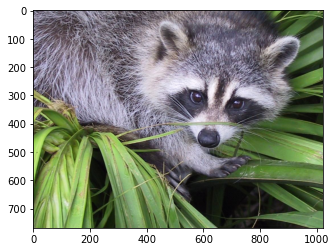

In [48]:
plt.imshow(face)
plt.show()

`face`는 아래 모양의 3차원 어레이를 가리킨다.

In [49]:
face.shape

(768, 1024, 3)

위 이미지에서 세로, 가로 축에 보여지는 숫자가 픽셀 수를 보여주며 정확한 픽셀 수는 다음과 같다.

* 행: 768개
* 열: 1024개
* 각각의 픽셀에 길이가 3인 1차원 어레이 포함. 

3차원 넘파이 어레이로 불러온 너구리 사진의 실제 값은 다음과 같다.

In [50]:
face

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

**RGB 색상 정보**

`768x1024` 개의 픽셀에 포함된 길이 3인 어레이는 
R(빨강), G(초록), B(파랑) 색상에 대한 정보를 각각 담는다.
또한 색상 정보는 각각 0부터 255 사이의 값을 사용한다.

어레이에 사용된 값들의 정확한 자료형은 `uint8`, 즉, 8바이트로 표현된 양의 정수 자료형이다.

In [51]:
face.dtype

dtype('uint8')

In [52]:
face.min()

0

In [53]:
face.max()

255

**색상 정보 정규화**

여기서는 픽셀 정보를 0과 1사이의 부동소수점으로 변경해서 사용한다.
이유는 여러 이미지 변환을 시도할 때 0과 1사이의 부동소수점의 값들이 나올 때
정확하게 기능하기 때문이다.

RGB 정보의 최댓값이 255이기에 모든 항목을 255로 나누어 0과 1사이의 값으로 
정규화<font size='2'>normalization</font>시킨다.

In [54]:
face = face/255

**RGB 색상 확인**

빨강(Red)색 요소는 각 픽셀의 0번 인덱스로 구성된다.

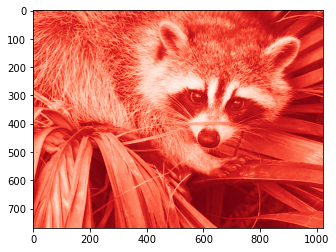

In [55]:
face_red = face[:, :, 0]

plt.imshow(face_red, cmap='Reds_r')
plt.show()

초록(Green)색 요소는 각 픽셀의 1번 인덱스로 구성된다.

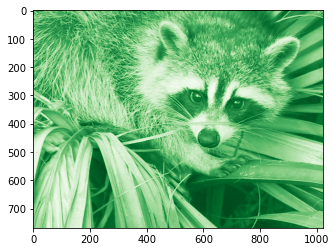

In [56]:
face_green = face[:, :, 1]

plt.imshow(face_green, cmap='Greens_r')
plt.show()

파랑(Blue)색 요소는 각 픽셀의 2번 인덱스로 구성된다.

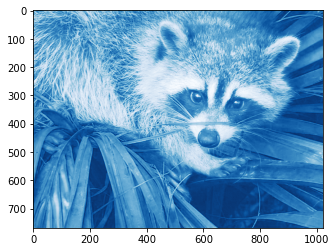

In [57]:
face_blue = face[:, :, 2]

plt.imshow(face_blue, cmap='Blues_r')
plt.show()

:::{admonition} 색지도<font size='2'>color map</font>
:class: info

matplotlib 라이브러리에서 이미지를 출력할 때 색지도<font size='2'>color map</font>를 선택해야 한다.
색지도는 `cmap` 옵션으로 지정하며 앞서 R, G, B에 해당하는 색지도는 각각 `Reds`, `Greens`, `Blues`가
사용되었으며 아래 이미지 중에서 선택되었다.
참고로 `_r`은 선택된 색지도를 역순으로 적용한다는 의미이다.

<br>
<div align="center" border="1px"><img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_002_2_0x.png" style="width:80%;"></div>

보다 다양한 색지도는 [Matplotlib: Choosing Colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)를 
참고한다.
:::

**흑백 이미지 변환**

흑백사진으로 변경하려면 RGB 정보를 전부 이용하여 하나의 값을 계산해야 한다.
흑백 이미지의 명암을 구현하는 **벡터 내적** 수식은 다음과 같다.

$$
[R, G, B]\cdot[0.2989, 0.5870, 0.1140]
= R \cdot 0.2989 + G \cdot 0.5870 + B \cdot 0.1140
$$

벡터 내적 연산은 `dot()` 함수를 이용한 어레이의 내적 연산으로 쉽게 계산된다.

In [58]:
face_gray = np.dot(face, [0.2989, 0.5870, 0.114])

`np.dot()` 함수가 컬러 사진 3차원 어레이이와 3차원 벡터(1차원 어레이)의 점곱을
처리하는 방식 3차원 어레이의 마지막 축의 항목들과의 내적으로 계산된다.
따라서 결과는 2차원 어레이며, 흑백 이미지의 정보를 모두 갖고 있다.
따라서 보다 선명한 명암을 보여주는 이미지가 결과로 나온다.

In [59]:
face_gray

array([[0.4582, 0.5249, 0.5846, ..., 0.4626, 0.5033, 0.5346],
       [0.3378, 0.4201, 0.4971, ..., 0.4578, 0.5205, 0.5676],
       [0.275 , 0.3574, 0.4397, ..., 0.4589, 0.5217, 0.5648],
       ...,
       [0.38  , 0.3996, 0.452 , ..., 0.5477, 0.5438, 0.5457],
       [0.3643, 0.4035, 0.4665, ..., 0.5462, 0.5418, 0.5418],
       [0.3652, 0.4114, 0.4635, ..., 0.5422, 0.5379, 0.5339]])

In [60]:
face_gray.shape

(768, 1024)

흑백 사진으로 출력하려면 색지도 인자로 `gray`를 지정한다.

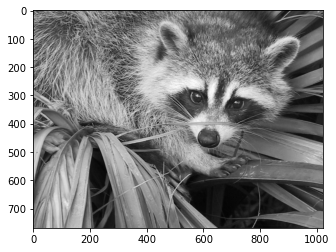

In [61]:
plt.imshow(face_gray, cmap='gray')
plt.show()

### 이미지 크기 조정

이미지 크기 조정은 픽셀 수를 조절하는 방식으로 이루어진다. 
가장 단순한 방식은 행과 열에서 각각 2개씩 건너뛰며 픽셀을 선택하는 것이다.
일부 데이터가 상실되지만 눈으로 확인될 정도까지는 아니다.

아래 코드는 행과 열에 대해 모두 스텝 2를 지정하고 슬라이싱을 적용한다. 
즉, `2x2` 모양을 이루는 네 개의 픽셀 중에 상단 왼편에 있는 픽셀만 선택한다.

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/interpolation01.png" style="width:150px;"></div>

In [62]:
face_half_simple = face[::2, ::2,:]

행과 열의 픽셀 수가 모두 절반으로 줄었다.

In [63]:
face_half_simple.shape

(384, 512, 3)

이미지를 확인하면 살짝 흐려진 느낌을 받는다.

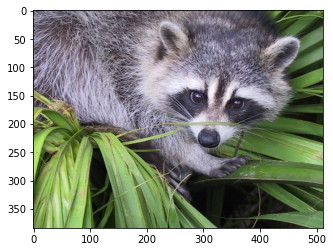

In [64]:
plt.imshow(face_half_simple)
plt.show()

**보간법**

가장 일반적으로 사용되는 이미지 변경 방법은 **보간법**<font size='2'>interpolation</font>이다. 
이미지 크기 변경에 사용되는 다양한 보간법 기법이 있지만 여기서는 두 픽셀 사이의 평균값을 취하는 방식을 이용한다.
보간법의 다양한 방식에 대한 설명은 [OpenCV 보간법](https://m.blog.naver.com/vps32/221762092250)을 참고한다.

아래 코드는 짝수 인덱스의 값과 홀수 인덱스의 값의 평균을 취하는 방식으로 보간법을 활용한다.

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/interpolation02.png" style="width:150px;"></div>

In [65]:
face_half_interpolation = (face[::2, ::2, :] + face[1::2, 1::2, :])/2

In [66]:
face_half_interpolation.shape

(384, 512, 3)

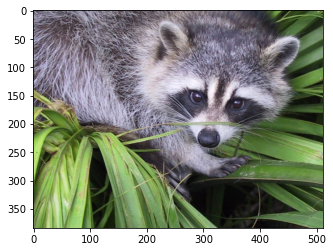

In [67]:
plt.imshow(face_half_interpolation)
plt.show()

4분의 1 크기의 두 이미지 데이터가 조금 다르기는 하지만 이미지 상으로 차이점을 발견하기 어렵다.

- 단순 크기 조정 이미지의 처음 2행

In [68]:
face_half_simple[:2]

array([[[0.4745, 0.4392, 0.5137],
        [0.6   , 0.5647, 0.6471],
        [0.6078, 0.5725, 0.6549],
        ...,
        [0.5294, 0.5608, 0.3608],
        [0.4549, 0.4824, 0.2784],
        [0.5137, 0.5333, 0.3216]],

       [[0.2863, 0.2588, 0.3294],
        [0.451 , 0.4235, 0.4941],
        [0.498 , 0.4667, 0.549 ],
        ...,
        [0.4235, 0.4627, 0.2588],
        [0.4078, 0.4471, 0.2392],
        [0.5216, 0.5569, 0.3412]]])

- 보간법 적용 이미지의 처음 2행

In [69]:
face_half_interpolation[:2]

array([[[0.4529, 0.4216, 0.4941],
        [0.5686, 0.5353, 0.6176],
        [0.5941, 0.5608, 0.6471],
        ...,
        [0.4784, 0.5118, 0.3078],
        [0.4588, 0.4863, 0.2784],
        [0.5431, 0.5667, 0.3549]],

       [[0.3333, 0.3118, 0.3804],
        [0.4608, 0.4373, 0.5118],
        [0.4961, 0.4706, 0.5549],
        ...,
        [0.4216, 0.4667, 0.2588],
        [0.4314, 0.4725, 0.2588],
        [0.5059, 0.5451, 0.3275]]])

## 부울 인덱싱

부울 인덱싱<font size='2'>boolean indexing</font>은
지금까지 소개한 인덱싱/슬라이싱 기법이 처리하지 못하는 기능을 제공한다.

### 1차원 부울 어레이 활용

1차원 부울 어레이를 이용한 인덱싱을 설명하기 위해 아래 두 개의 어레이를 이용한다.

* 길이가 7인 1차원 어레이: 중복된 사람 이름을 항목으로 담고 있는 벡터

In [70]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

* (7, 4) 모양의 2차원 어레이. `randn()` 함수는 표준 정규 분포를 이용하여 임의의 부동소수점으로 이루어진 어레이를 생성한다.

In [71]:
np.random.seed(3)

data = np.random.randn(7, 4)
data

array([[ 1.7886,  0.4365,  0.0965, -1.8635],
       [-0.2774, -0.3548, -0.0827, -0.627 ],
       [-0.0438, -0.4772, -1.3139,  0.8846],
       [ 0.8813,  1.7096,  0.05  , -0.4047],
       [-0.5454, -1.5465,  0.9824, -1.1011],
       [-1.185 , -0.2056,  1.4861,  0.2367],
       [-1.0238, -0.713 ,  0.6252, -0.1605]])

부울 인덱싱을 설명하기 위해 `data` 가 가리키는 2차원 어레이의 각 행과 `names` 어레이가 가리키는 각 항목이
서로 연관된다고 가정한다. 
예를 들어, `'Bob'`은 0번 인덱스와 3번 인덱스의 행과 연관되고,
`'Joe'`는 1번, 5번, 6번 인덱스의 행과 연관된다.

이제 `data` 어레이에서 `'Bob'`과 연관된 행만 추출하여 2차원 어레이를 생성하려 해보자.
먼저 `names`에 포함된 이름이 `'Bob'`인지 여부를 확인한다.
그러면 진리값으로 이루어진 길이가 7인 어레이가 생성된다.

In [72]:
name_Bob = (names == 'Bob')
name_Bob

array([ True, False, False,  True, False, False, False])

이제 `name_Bob`을 `data` 2차원 어레이에 인덱싱으로 적용하면
`True`가 위치한 인덱스에 해당하는 행인 0번과 3번 행만 추출해서
새로운 2차원 어레이를 생성한다.

In [73]:
data[name_Bob]

array([[ 1.7886,  0.4365,  0.0965, -1.8635],
       [ 0.8813,  1.7096,  0.05  , -0.4047]])

인덱싱에 사용되는 부울 어레이의 길이가 사용되는 인덱싱에 적용되는 축의 길이와 동일해야 함에 주의한다.

**부울 인덱싱과 일반 인덱싱/슬라이싱 혼합**

부울 인덱싱과 일반 인덱싱, 슬라이싱을 혼합할 수 있다.

* 행 기준: Bob이 포함된 행의 인덱스를 갖는 행
* 열 기준: 3번 열

In [74]:
data[name_Bob, 3]

array([-1.8635, -0.4047])

* 행 기준: Bob이 포함된 행의 인덱스를 갖는 행
* 열 기준: 2번 열 이후 전체

In [75]:
data[name_Bob, 2:]

array([[ 0.0965, -1.8635],
       [ 0.05  , -0.4047]])

### 마스크 활용

**부울 마스크**<font size='2'>boolean mask</font>는
논리 연산자(`~`, `&`, `|`)를 사용하여 얻어진 부울 어레이 표현식이다.
마스크를 활용하면 보다 다양한 부울 인덱싱을 간단하게 적용할 수 있다.

예를 들어, 이름이 `'Bob'`이 아닌 이름과 연관된 행만 가져오려면
`==` 대신에 `!=`를 이용하거나 `==`와 `~` 연산자를 함께 이용한다.

In [76]:
mask = names != 'Bob'
data[mask]

array([[-0.2774, -0.3548, -0.0827, -0.627 ],
       [-0.0438, -0.4772, -1.3139,  0.8846],
       [-0.5454, -1.5465,  0.9824, -1.1011],
       [-1.185 , -0.2056,  1.4861,  0.2367],
       [-1.0238, -0.713 ,  0.6252, -0.1605]])

In [77]:
mask = ~name_Bob
data[mask]

array([[-0.2774, -0.3548, -0.0827, -0.627 ],
       [-0.0438, -0.4772, -1.3139,  0.8846],
       [-0.5454, -1.5465,  0.9824, -1.1011],
       [-1.185 , -0.2056,  1.4861,  0.2367],
       [-1.0238, -0.713 ,  0.6252, -0.1605]])

다음은 `'Bob'` 또는 `'Will'` 이 위치한 인덱스에 해당하는 행만 가져온다.

In [78]:
mask = (names == 'Bob') | (names == 'Will')
data[mask]

array([[ 1.7886,  0.4365,  0.0965, -1.8635],
       [-0.0438, -0.4772, -1.3139,  0.8846],
       [ 0.8813,  1.7096,  0.05  , -0.4047],
       [-0.5454, -1.5465,  0.9824, -1.1011]])

**항목 업데이트**

마스크를 이용하여 전체 행 또는 전체 열을 특정 값으로 변경할 수 있다.
아래 코드는 `data`에서 `'Joe'`와 관련 없는 행의 항목을 모두 7로 변경한다.

In [79]:
mask = names != 'Joe'
data[mask] = 7
data

array([[ 7.    ,  7.    ,  7.    ,  7.    ],
       [-0.2774, -0.3548, -0.0827, -0.627 ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [-1.185 , -0.2056,  1.4861,  0.2367],
       [-1.0238, -0.713 ,  0.6252, -0.1605]])

**다차원 마스크**

`data`가 가리키는 2차원 어레이에서 음수 항목만 추출해서 1차원 어레이를 생성해보자.
이를 위해 먼저 어레이의 각 항목이 음수인지 여부를 확인하는 부울 마스크를 다음과 같이 생성한다.

In [80]:
mask = data < 0
mask

array([[False, False, False, False],
       [ True,  True,  True,  True],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [ True,  True, False, False],
       [ True,  True, False,  True]])

위 마스크를 `data`에 인덱싱으로 적용하면 음수 항목만 끄집어 낸 1차원 어레이가 생성된다.

In [81]:
data[mask]

array([-0.2774, -0.3548, -0.0827, -0.627 , -1.185 , -0.2056, -1.0238,
       -0.713 , -0.1605])

또한 마스크를 이용하여 모든 음수 항목을 0으로 변경할 수도 있다.

In [82]:
data[mask] = 0

data

array([[7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.    , 1.4861, 0.2367],
       [0.    , 0.    , 0.6252, 0.    ]])

### 부울 인덱싱과 뷰

부울 인덱싱은 뷰를 이용하지 않고 항상 새로운 어레이를 생성한다.

In [83]:
data2 = data[names == 'Bob']
data2

array([[7., 7., 7., 7.],
       [7., 7., 7., 7.]])

`data2`의 0번 행을 모두 -1로 변경해도 `data`는 변하지 않는다.

In [84]:
data2[0] = -1
data2

array([[-1., -1., -1., -1.],
       [ 7.,  7.,  7.,  7.]])

하지만 `data`는 변경되지 않았다.

In [85]:
data

array([[7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.    , 1.4861, 0.2367],
       [0.    , 0.    , 0.6252, 0.    ]])

## 팬시 인덱싱

**팬시 인덱싱**<font size='2'>fancy indexing</font>은 인덱스로 구성된 1차원 리스트와 튜플을 이용한다.
팬시 인덱싱 또한 부울 인덱싱처럼 뷰를 이용하지 않고 객체를 항상 새로 생성한다.

### 인덱스 리스트 활용

아래 코드는 0으로 채워진 (8, 4) 모양의 2차원 어레이를 생성한다.

In [86]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

**0번 축 팬시 인덱싱**

아래 두 예제는 하나의 인덱스 리스트를 이용한 전형적인 팬시 인덱싱의 활용을 보여준다.
0번 축에 대해 인덱싱이 적용됨을 주목한다.

- 예제 1: `arr` 의 4번, 3번, 0번, 6번 인덱스에 해당하는 항목을 모아서 새로운 어레이를 생성한다.
정해진 순서대로 항목을 재배열한다는 점에 주의한다.

In [87]:
arr[[4, 3, 0, 6]]

array([[16, 17, 18, 19],
       [12, 13, 14, 15],
       [ 0,  1,  2,  3],
       [24, 25, 26, 27]])

- 예제 2: 음수 인덱스도 사용할 수 있다.
밑에서 셋째, 다섯째, 일곱째 항목으로 이루어진 어레이는 다음과 같이 구한다.

In [88]:
arr[[-3, -5, -7]]

array([[20, 21, 22, 23],
       [12, 13, 14, 15],
       [ 4,  5,  6,  7]])

**1번 축 팬시 인덱싱**

2차원 어레이의 1번 축에 팬시 인덱싱을 적용하려면 모든 행을 선택하는 기능을 함께 사용한다.
아래 코드는 전체 행을 대상으로 0번, 3번, 1번 열을 추출해서 2차원 어레이를 생성한다.

In [89]:
arr[:, [0, 3, 1]]

array([[ 0,  3,  1],
       [ 4,  7,  5],
       [ 8, 11,  9],
       [12, 15, 13],
       [16, 19, 17],
       [20, 23, 21],
       [24, 27, 25],
       [28, 31, 29]])

축별 팬시 인덱싱을 연속으로 실행할 수도 있다.
아래 코드는 1번, 5번, 7번, 2번 행에서 각각 0번, 3번, 1번 항목을 
추출하여 2차원 어레이를 생성한다.

In [90]:
arr[[1, 5, 7, 2]][:, [0, 3, 1]]

array([[ 4,  7,  5],
       [20, 23, 21],
       [28, 31, 29],
       [ 8, 11,  9]])

### 축과 팬시 인덱싱

여러 개의 인덱스 리스트를 사용할 수도 있다.
단, 모든 리스트의 길이가 동일해야 하며, 각 리스트의 동일한 위치의 항목의 튜플이 가리키는 값을 차례대로 추출한다.
즉, 여기서도 축이 중요한 역할을 수행한다.

아래 코드는 `(1, 0)`, `(5, 3)`, `(7, 2)`, `(2, 2)` 좌표에 위치한 항목으로 이루어진 어레이는 다음과 같이 
축별로 항목을 모아놓은 두 개의 인덱스 어레이를 사용해서 팬시 인덱싱을 진행한다.

In [91]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

**예제 1**

아래 이미지 모양의 2차원 어레이에서 색깔로 구분된 1차원 또는 2차원 어레이를 추출해보자.

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/fancy_indexing.png" style="width:250px;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://scipy-lectures.org/intro/numpy/array_object.html#indexing-and-slicing">Scipy Lecture Notes</a>&gt;</div></p>

먼저 이미지 모양의 2차원 어레이를 다음처럼 생성한다.

In [92]:
arr = np.arange(36).reshape(6, 6) + np.arange(0, 21, 4).reshape(6, 1)
arr

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

* 초록색 1차원 어레이: 0번 축과 1번 축의 팬시 인덱싱 조합

In [93]:
arr[[0,1,2,3,4], [1,2,3,4,5]]

array([ 1, 12, 23, 34, 45])

* 빨강색 1차원 어레이: 0번 축 팬시 인덱싱과 1번 축 인덱싱

In [94]:
arr[[0, 2, 5], 2]

array([ 2, 22, 52])

* 파랑색 2차원 어레이: 0번 축 슬라이싱과 1번 축 팬시 인덱싱

In [95]:
arr[3:, [0, 2, 5]]

array([[30, 32, 35],
       [40, 42, 45],
       [50, 52, 55]])

**예제 2**

3차원 어레이에 대해서도 동일한 방식으로 팬시 인덱싱을 적용할 수 있다.

In [96]:
arr = np.arange(32).reshape((4, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]],

       [[24, 25, 26, 27],
        [28, 29, 30, 31]]])

아래 코드는 `(1, 0, 2)`와 `(2, 1, 3)` 좌표에 위치한 3개의 항목으로 구성된 1차원 어레이를 생성한다.

In [97]:
arr[[1, 2], [0, 1], [2, 3]]

array([10, 23])

반면에 아래 코드는 `(1, 0)`과 `(2, 1)` 좌표에 위치한 두 개의 항목으로 구성된 2차원 어레이를 생성한다.
이유는 해당 좌표의 항목이 모두 길이가 4인 1차원 어레이이기 때문이다.

In [98]:
arr[[1, 2], [0, 1]]

array([[ 8,  9, 10, 11],
       [20, 21, 22, 23]])

## 어레이 쪼개기

**`np.split()` 함수**

어레이를 지정된 기준에 따라 여러 개의 어레이로 쪼갠다.
반환값은 쪼개진 어레이들의 리스트다.

아래 예제를 살펴보자.

In [99]:
arr = np.random.randn(7, 5)
arr

array([[-0.7688, -0.23  ,  0.7451,  1.9761, -1.2441],
       [-0.6264, -0.8038, -2.4191, -0.9238, -1.0239],
       [ 1.124 , -0.1319, -1.6233,  0.6467, -0.3563],
       [-1.7431, -0.5966, -0.5886, -0.8739,  0.0297],
       [-2.2483, -0.2678,  1.0132,  0.8528,  1.1082],
       [ 1.1194,  1.4875, -1.1183,  0.8458, -1.8609],
       [-0.6029, -1.9145,  1.0481,  1.3337, -0.1974]])

`np.split()` 함수의 인자는 하나의 인덱스이거나 여러 인덱스들의 리스트가 사용된다.
먼저, 정수 리스트가 들어오면 축이 정한 방향으로 리스트에 포함된 정수를 이용하여 여러 개의 구간으로 쪼갠다.

아래 코드는 행을 기준으로 행의 인덱스를 0-1, 2, 3-4, 5-6 네 개의 구간으로 쪼갠다.
따라서 결과는 네 개의 어레이로 이루어진 리스트가 되며,
각 어레의 모양은 다음과 같다.

```python
(2, 5), (1, 5), (2, 5), (2, 5)
```

In [100]:
np.split(arr, [2, 3, 5],axis=0)

[array([[-0.7688, -0.23  ,  0.7451,  1.9761, -1.2441],
        [-0.6264, -0.8038, -2.4191, -0.9238, -1.0239]]),
 array([[ 1.124 , -0.1319, -1.6233,  0.6467, -0.3563]]),
 array([[-1.7431, -0.5966, -0.5886, -0.8739,  0.0297],
        [-2.2483, -0.2678,  1.0132,  0.8528,  1.1082]]),
 array([[ 1.1194,  1.4875, -1.1183,  0.8458, -1.8609],
        [-0.6029, -1.9145,  1.0481,  1.3337, -0.1974]])]

반면에 열을 기준으로 0, 1-2, 3-4 3개의 구간으로 쪼개면 다음과 같으며,
각 어레이의 모양은 다음과 같다.

```python
(7, 1) (7, 2), (7, 2)
```

In [101]:
np.split(arr, [1, 3],axis=1)

[array([[-0.7688],
        [-0.6264],
        [ 1.124 ],
        [-1.7431],
        [-2.2483],
        [ 1.1194],
        [-0.6029]]),
 array([[-0.23  ,  0.7451],
        [-0.8038, -2.4191],
        [-0.1319, -1.6233],
        [-0.5966, -0.5886],
        [-0.2678,  1.0132],
        [ 1.4875, -1.1183],
        [-1.9145,  1.0481]]),
 array([[ 1.9761, -1.2441],
        [-0.9238, -1.0239],
        [ 0.6467, -0.3563],
        [-0.8739,  0.0297],
        [ 0.8528,  1.1082],
        [ 0.8458, -1.8609],
        [ 1.3337, -0.1974]])]

**`np.vsplit()`/`np.hsplit()` 함수**

두 함수는 `np.split()` 함수에 축을 각각 0과 1로 지정한 함수이다.

* `np.vsplit(arr, z)` := `np.split(arr, z, axis=0)`

In [102]:
np.vsplit(arr, [2, 3, 5])

[array([[-0.7688, -0.23  ,  0.7451,  1.9761, -1.2441],
        [-0.6264, -0.8038, -2.4191, -0.9238, -1.0239]]),
 array([[ 1.124 , -0.1319, -1.6233,  0.6467, -0.3563]]),
 array([[-1.7431, -0.5966, -0.5886, -0.8739,  0.0297],
        [-2.2483, -0.2678,  1.0132,  0.8528,  1.1082]]),
 array([[ 1.1194,  1.4875, -1.1183,  0.8458, -1.8609],
        [-0.6029, -1.9145,  1.0481,  1.3337, -0.1974]])]

* `np.hsplit(arr, z)` := `np.split(arr, z, axis=1)`

In [103]:
np.hsplit(arr, [1, 3])

[array([[-0.7688],
        [-0.6264],
        [ 1.124 ],
        [-1.7431],
        [-2.2483],
        [ 1.1194],
        [-0.6029]]),
 array([[-0.23  ,  0.7451],
        [-0.8038, -2.4191],
        [-0.1319, -1.6233],
        [-0.5966, -0.5886],
        [-0.2678,  1.0132],
        [ 1.4875, -1.1183],
        [-1.9145,  1.0481]]),
 array([[ 1.9761, -1.2441],
        [-0.9238, -1.0239],
        [ 0.6467, -0.3563],
        [-0.8739,  0.0297],
        [ 0.8528,  1.1082],
        [ 0.8458, -1.8609],
        [ 1.3337, -0.1974]])]

## 연습문제

참고: [(실습) 어레이 인덱싱](https://colab.research.google.com/github/codingalzi/datapy/blob/master/practices/practice-numpy_2.ipynb)